In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

/Users/Sam/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Sam/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv')
df = df.dropna()

In [3]:
df = df.drop('ID', axis = 1)

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
df['default payment next month'] = df['default payment next month'].replace(to_replace=0, value="Paid")
df['default payment next month'] = df['default payment next month'].replace(to_replace=1, value="Default")
target_names = ["Default", "Paid"]

# Feature Scaling Limit Balance

In [6]:
df['LIMIT_BAL'] = df['LIMIT_BAL']/1000

# Feature Selection

In [7]:
def onefeature(model, name):
    arr = []
    X_feature = df[[name]]
    X_train, X_test, y_train, y_test = train_test_split(X_feature, target, test_size = 0.3, random_state = 42)
    modelfit = model.fit(X_train, y_train)
    modely_pred = modelfit.predict(X_test)
    arr.append(round(accuracy_score(y_test, modely_pred),3))
    arr.append(round(recall_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label= "Default"),3))
    arr.append(round(precision_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label = "Default"),3))
    return arr

In [8]:
colnames = df.columns.tolist()
colnames.pop()
target = df['default payment next month']

In [9]:
onemodel = KNeighborsClassifier()

In [10]:
for title in colnames:
    print title
    print onefeature(onemodel, title)

LIMIT_BAL
[0.759, 0.105, 0.334]
SEX


/Users/Sam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.782, 0.0, 0.0]
EDUCATION
[0.782, 0.0, 0.0]
MARRIAGE
[0.782, 0.0, 0.0]
AGE
[0.746, 0.07, 0.228]
PAY_0
[0.782, 0.009, 0.45]
PAY_2
[0.79, 0.32, 0.531]
PAY_3
[0.437, 0.736, 0.241]
PAY_4
[0.786, 0.265, 0.515]
PAY_5
[0.792, 0.249, 0.55]
PAY_6
[0.787, 0.238, 0.522]
BILL_AMT1
[0.742, 0.097, 0.256]
BILL_AMT2
[0.745, 0.082, 0.246]
BILL_AMT3
[0.743, 0.076, 0.227]
BILL_AMT4
[0.744, 0.073, 0.229]
BILL_AMT5
[0.748, 0.078, 0.25]
BILL_AMT6
[0.75, 0.082, 0.264]
PAY_AMT1
[0.765, 0.036, 0.237]
PAY_AMT2
[0.744, 0.051, 0.183]
PAY_AMT3
[0.764, 0.039, 0.242]
PAY_AMT4
[0.755, 0.044, 0.206]
PAY_AMT5
[0.763, 0.034, 0.218]
PAY_AMT6
[0.648, 0.412, 0.286]


# Model Exploration

In [11]:
#makes the percentage columns I was talking about
def percent_maker(df):
    for i in range(1,7):
        df[('pct_paid_{}'.format(i))] = df[('PAY_AMT{}'.format(i))] / df[('BILL_AMT{}'.format(i))]

percent_maker(df)

#replaces null and infinite values
df = df.replace({None:0, np.inf:1})

#new X features for modeling...
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','pct_paid_1', 'pct_paid_2', 'pct_paid_3',
       'pct_paid_4', 'pct_paid_5', 'pct_paid_6']]

target = df['default payment next month']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42)

In [13]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pct_paid_1,pct_paid_2,pct_paid_3,pct_paid_4,pct_paid_5,pct_paid_6
0,20.0,2.0,2.0,1.0,24.0,0.000000,0.222115,0.000000,0.000000,0.000000,0.000000
1,120.0,2.0,2.0,2.0,26.0,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,90.0,2.0,2.0,2.0,34.0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
3,50.0,2.0,2.0,1.0,37.0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
4,50.0,1.0,2.0,1.0,57.0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492


In [14]:
modellist = [KNeighborsClassifier(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

In [15]:
for model in modellist:
    modelfit = model.fit(X_train, y_train)
    modelypred = modelfit.predict(X_test)
    print str(model).split("(")[0] + ": " + str(round(accuracy_score(y_test, modelypred),3))
    print confusion_matrix(y_test, model.predict(X_test))

KNeighborsClassifier: 0.738
[[ 279 1681]
 [ 674 6366]]
LogisticRegression: 0.782
[[   0 1960]
 [   0 7040]]
GaussianNB: 0.234
[[1931   29]
 [6865  175]]
DecisionTreeClassifier: 0.681
[[ 618 1342]
 [1527 5513]]
RandomForestClassifier: 0.754
[[ 551 1409]
 [ 804 6236]]
GradientBoostingClassifier: 0.782
[[ 177 1783]
 [ 175 6865]]


# Model Selection

In [16]:
y = target.replace("Paid", 0).replace("Default", 1)

In [17]:
def cost(tp, fp):
    letter = 1.5
    notdef = 1000
    probnotdef = 0.05
    lossfalsep = 2000
    probleave = 0.01
    totcost = letter * (tp + fp) - notdef * probnotdef * tp + lossfalsep * probleave * fp
    return totcost

In [18]:
def allfeaturecost(model, thresh):
    
    #fit model using different thresholds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    y_test2 = np.array(y_test)
    modelfit = model.fit(X_train, y_train)
    pred_proba = modelfit.predict_proba(X_test)
    fplist = []
    tplist = []
    costlist = []
    
    #determine true positives and false positives for cost calculation
    for item in range(len(thresh)):
        tp = 0
        fp = 0
        for elem in range(len(pred_proba)):
            if pred_proba[elem][1]>=thresh[item] and y_test2[elem] == 1:
                tp += 1
            elif pred_proba[elem][1] >=thresh[item] and y_test2[elem] == 0:
                fp += 1
            else:
                pass
        tplist.append(tp)
        fplist.append(fp)
        costlist.append(cost(tp,fp))
        
    #plot the cost against the threshold
    
    plt.plot(thresh, costlist, label='Model: ' + str(model).split("(")[0])
    plt.xlabel('Threshold', fontsize = 20)
    plt.ylabel('Cost', fontsize = 20)
    plt.title('Cost-Threshold Curve', fontsize = 30)
    plt.legend(loc="upper right")
        
    return tplist, fplist, costlist, thresh

In [19]:
def plotfunction(models, thresh):
    plt.figure(figsize = (20, 10))
    for model in models:
        tplist, fplist, costlist, thresh = allfeaturecost(model, thresh)
    plt.plot(thresh, costlist)

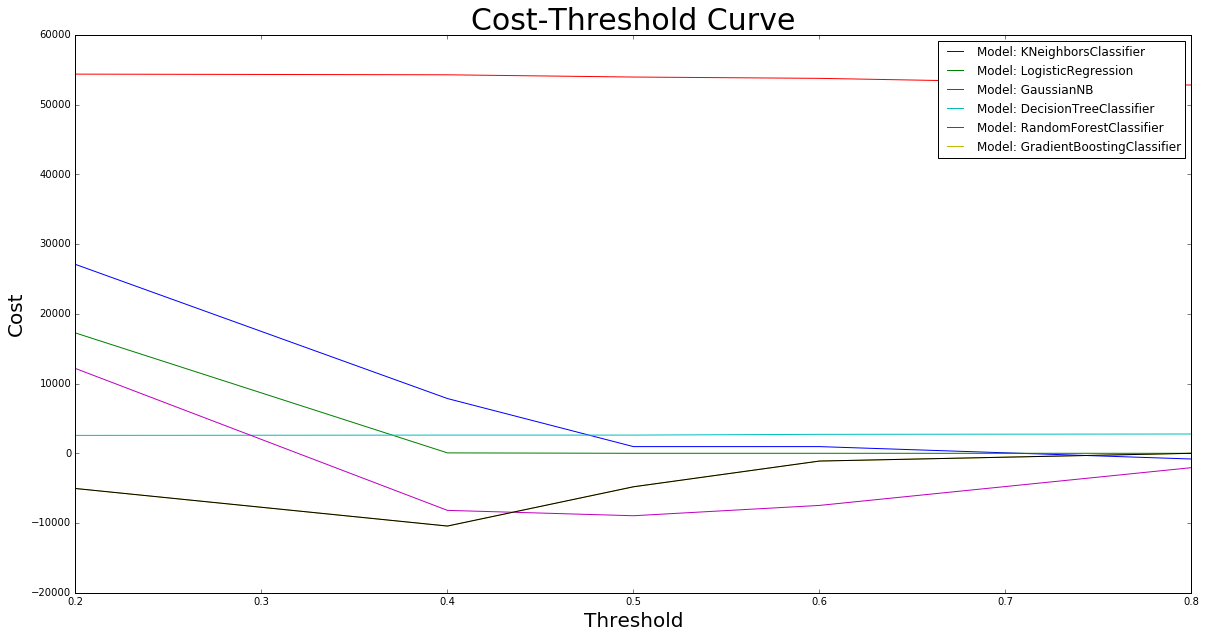

In [20]:
thresh = [0.2, 0.4, 0.5, 0.6, 0.8]
plotfunction(modellist, thresh)

# Precision/Accuracy Testing

In [21]:
def allfeature(model):
    arr = []
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42)
    modelfit = model.fit(X_train, y_train)
    modely_pred = modelfit.predict(X_test)
    pred_proba = modelfit.predict_proba(X_test)
    arr.append(round(accuracy_score(y_test, modely_pred),3))
    arr.append(round(recall_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label= "Default"),3))
    arr.append(round(precision_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label = "Default"),3))
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1], pos_label = "Default")

    print precision, recall, thresholds

In [23]:
for model in modellist:
    print model
    print allfeature(model)

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[ 0.21777778  0.21729934  0.21489939  0.20889773  0.19490838  0.16755853
  1.        ] [ 1.          0.99591837  0.96989796  0.85765306  0.61326531  0.25561224
  0.        ] [ 0.   0.2  0.4  0.6  0.8  1. ]
None
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[ 0.21789883  0.21781187  0.2177249  ...,  0.5         0.          1.        ] [  1.00000000e+00   9.99489796e-01   9.98979592e-01 ...,   5.10204082e-04
   0.00000000e+00   0.00000000e+00] [ 0.59954895  0.60001971  0.60071793 ...,  0.96634049  0.96647397
  0.96967935]
None
GaussianNB(priors=None)
[ 0.21780198  0.21771505  0.21773925 ...,  0.09375     0.0947

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# old code from iris example for reference
# if __name__ == "__main__":
#         # Load Iris Data
#         iris_data = load_iris()
#         features = iris_data.data
#         feature_names = iris_data.feature_names
#         target = iris_data.target
#         target_names = iris_data.target_names
#
#         knn = KNeighborsClassifier(n_neighbors=3)  # replace with your own ML model here
#         knn.fit(features, target)
#
#         joblib.dump(knn, 'models/iris_model.pkl')
if __name__ == "__main__":
    #load data
    df = pd.read_csv('default_of_credit_card_clients.csv')
    df = df.dropna()
    df = df.drop('ID', axis = 1)
    df['default payment next month'] = df['default payment next month'].replace(to_replace=0, value="Paid")
    df['default payment next month'] = df['default payment next month'].replace(to_replace=1, value="Default")
    df['LIMIT_BAL'] = df['LIMIT_BAL']/1000

    #makes the percentage columns I was talking about - pct paid 1 is 1 month ago, pct paid 2 is 2 months ago, etc.
    def percent_maker(df):
        for i in range(1,7):
            df[('pct_paid_{}'.format(i))] = df[('PAY_AMT{}'.format(i))] / df[('BILL_AMT{}'.format(i))]
    percent_maker(df)

    #replaces null and infinite values
    df = df.replace({None:0, np.inf:1})

    #new X features for modeling...
    features = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','pct_paid_1', 'pct_paid_2', 'pct_paid_3',
       'pct_paid_4', 'pct_paid_5', 'pct_paid_6']]
    feature_names = list(features.columns.values)
    target = df['default payment next month']
    target_names = ["Paid", "Default"]

    # run randomforest on data we have
    RF = RandomForestClassifier()
    RF.fit(features, target)


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
RF.predict(features)

array(['Default', 'Default', 'Paid', ..., 'Default', 'Default', 'Default'], dtype=object)

In [13]:
features.ix[0]

LIMIT_BAL     20.000000
SEX            2.000000
EDUCATION      2.000000
MARRIAGE       1.000000
AGE           24.000000
pct_paid_1     0.000000
pct_paid_2     0.222115
pct_paid_3     0.000000
pct_paid_4     0.000000
pct_paid_5     0.000000
pct_paid_6     0.000000
Name: 0, dtype: float64

In [10]:
confusion_matrix(target, RF.predict(features))

array([[ 6375,   261],
       [  121, 23243]])

In [24]:
RF.predict([20,2,2,1,24,0,0.222115,0.,0.222115,0,0.222115])

/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Paid'], dtype=object)